# Credit Risk Modeling - Early Risk Indicators for Predicting Delinquency

## 1. Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load and Explore Dataset

In [2]:
df = pd.read_excel('Tata_intern.xlsx')
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [3]:
df.shape[0]

500

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [5]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [6]:
df.duplicated().sum() 

np.int64(0)

In [7]:
df.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

### Early Risk Indicators for Predicting Delinquency

Based on the dataset and domain knowledge, the following variables are most relevant for predicting delinquency:

1. **Missed_Payments**  
   Directly reflects the customer's payment behavior and is a strong indicator of potential delinquency.

2. **Credit_Utilization**  
   High utilization rates may signal financial stress and increased risk of delinquency.

3. **Debt_to_Income_Ratio**  
   A higher ratio suggests the customer may be over-leveraged, increasing the likelihood of delinquency.

These variables are commonly used in credit risk modeling and are supported by their presence in the `importances` list.


## 4. Handle Missing Data

In [8]:
missing_data = df.isnull().sum()
print("Missing data in each column:" , missing_data)

Missing data in each column: Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


In [9]:
df["Income"] = df["Income"].fillna(df["Income"].mean())
df["Loan_Balance"] = df["Loan_Balance"].fillna(df["Loan_Balance"].mean())
df["Credit_Score"] = df["Credit_Score"].fillna(df["Credit_Score"].mean())

In [10]:
df.isnull().sum()  # Check again after imputation

Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

## 5. Select Key Variables

In [11]:
key_vars = ['Missed_Payments', 'Credit_Utilization', 'Debt_to_Income_Ratio', 
            'Age', 'Income', 'Employment_Status', 'Delinquent_Account']

df[key_vars].head()


,Missed_Payments,Credit_Utilization,Debt_to_Income_Ratio,Age,Income,Employment_Status,Delinquent_Account
0,3,0.390502,0.317396,56,165580.0,EMP,0
1,6,0.312444,0.196093,69,100999.0,Self-employed,1
2,0,0.359930,0.301655,46,188416.0,Self-employed,0
3,3,0.371400,0.264794,32,101672.0,Unemployed,0
4,2,0.234716,0.510583,60,38524.0,Self-employed,0


## 6. Correlation Analysis

In [12]:
correlation = df[key_vars].corr(numeric_only=True)['Delinquent_Account'].sort_values(ascending=False)
print(correlation)

Delinquent_Account      1.000000
Income                  0.043897
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Missed_Payments        -0.026478
Name: Delinquent_Account, dtype: float64


## 7. Data Visualization  

### (a) Missed Payments vs Delinquency


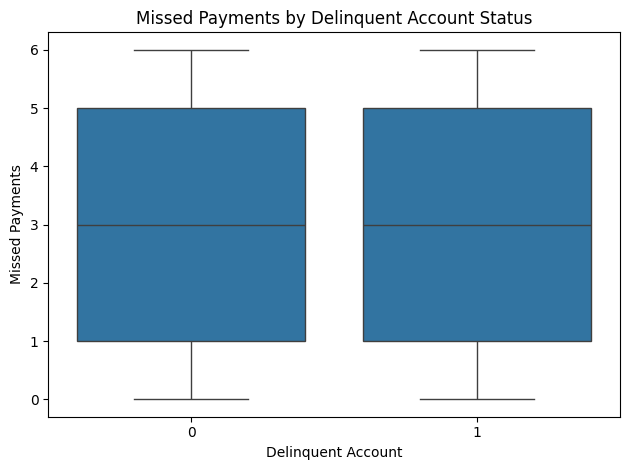

In [13]:
sns.boxplot(x='Delinquent_Account', y='Missed_Payments', data=df)
plt.title('Missed Payments by Delinquent Account Status')
plt.xlabel('Delinquent Account')
plt.ylabel('Missed Payments')
plt.tight_layout()
plt.show()

### (b) Credit Utilization vs Delinquency

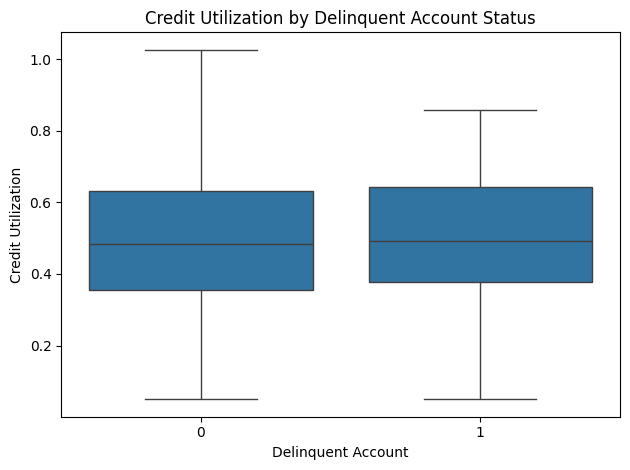

In [14]:
sns.boxplot(x='Delinquent_Account', y='Credit_Utilization', data=df)
plt.title('Credit Utilization by Delinquent Account Status')
plt.xlabel('Delinquent Account')
plt.ylabel('Credit Utilization')
plt.tight_layout()
plt.show()

### (c) Debt-to-Income Ratio vs Delinquency

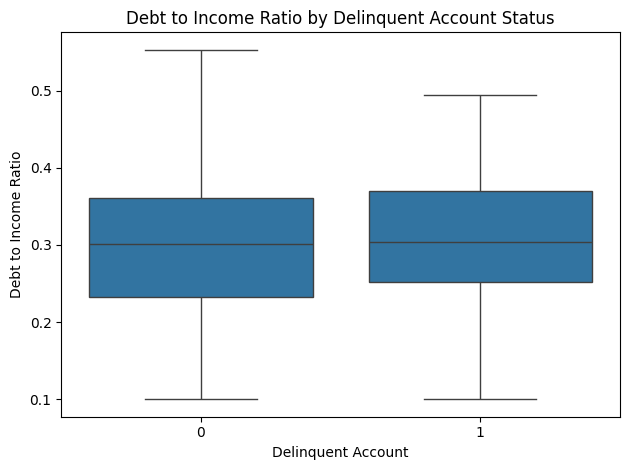

In [15]:
sns.boxplot(x='Delinquent_Account', y='Debt_to_Income_Ratio', data=df)
plt.title('Debt to Income Ratio by Delinquent Account Status')
plt.xlabel('Delinquent Account')
plt.ylabel('Debt to Income Ratio')
plt.tight_layout()
plt.show()

### (d) Employment Status vs Delinquency

In [16]:
df.groupby('Employment_Status')['Delinquent_Account'].mean().sort_values(ascending=False)

Employment_Status
Unemployed       0.193548
Employed         0.182927
Self-employed    0.162500
employed         0.155844
EMP              0.148148
retired          0.114943
Name: Delinquent_Account, dtype: float64

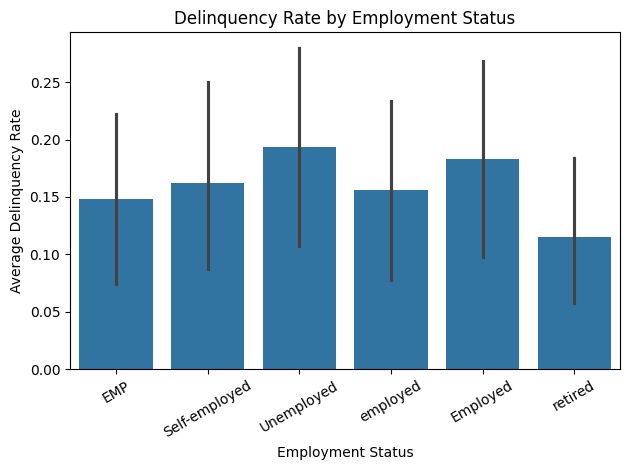

In [17]:
sns.barplot(x='Employment_Status', y='Delinquent_Account', data=df)
plt.title('Delinquency Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Delinquency Rate')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## 8. Feature Selection & Scaling

In [18]:

features = ['Missed_Payments', 'Credit_Utilization', 'Debt_to_Income_Ratio', 'Age', 'Income', 
            'Credit_Score', 'Loan_Balance', 'Account_Tenure']
X = df[features]
y = df['Delinquent_Account']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Logistic Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Use Decision Tree Classifier

In [21]:
dt = DecisionTreeClassifier(random_state=43)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,43
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred_lr = logreg.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [23]:
# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.86
Confusion Matrix:
 [[86  0]
 [14  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100

Decision Tree Accuracy: 0.75
Confusion Matrix:
 [[72 14]
 [11  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        86
           1       0.18      0.21      0.19        14

    accuracy                           0.75       100
   macro avg       0.52      0.53      0.52       100
weighted avg       0.77      0.75      0.76       100



C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

## 12. Compare Actual vs Predicted (Logistic Regression)

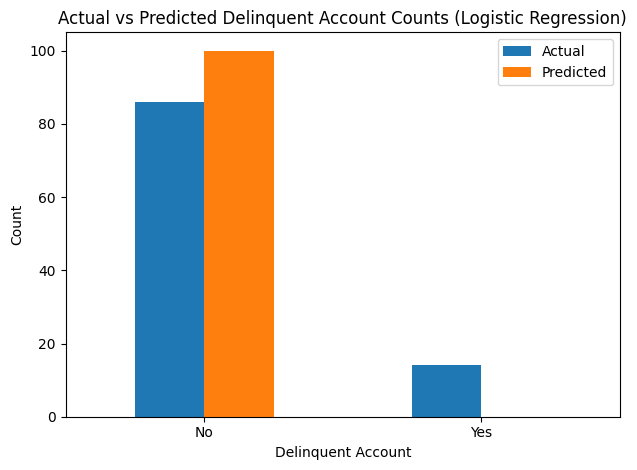

In [30]:
# Bar plot comparing actual vs predicted values for logistic regression
actual_counts_lr = y_test.value_counts().sort_index()
predicted_counts_lr = pd.Series(y_pred_lr).value_counts().sort_index()

bar_df_lr = pd.DataFrame({
    'Actual': actual_counts_lr,
    'Predicted': predicted_counts_lr
})

bar_df_lr.plot(kind='bar')
plt.title('Actual vs Predicted Delinquent Account Counts (Logistic Regression)')
plt.xlabel('Delinquent Account')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

## 13. Hyperparameter Tuning (Decision Tree)

In [24]:
# Hyperparameter tuning for Decision Tree to improve accuracy

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=43),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Params:", grid_search.best_params_)

Best Decision Tree Accuracy: 0.86
Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


## 14. Compare Actual vs Predicted (Best Decision Tree)

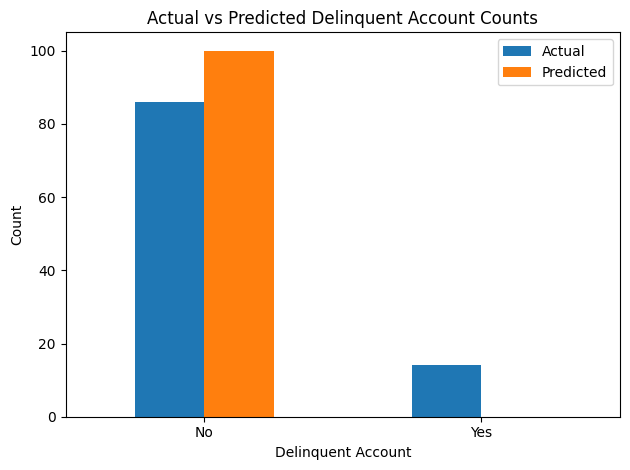

In [29]:
# Bar plot comparing actual vs predicted values for the best decision tree
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_pred_best_dt).value_counts().sort_index()

bar_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

bar_df.plot(kind='bar')
plt.title('Actual vs Predicted Delinquent Account Counts')
plt.xlabel('Delinquent Account')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()